## 사이킷런으로 Linear Regression 모델을 사용해 보자

In [2]:
# 패키지를 Import
import numpy as np
from sklearn.linear_model import LinearRegression

In [9]:
# x =[0,1,2,3,4,5,6,7,8,9]
# 1차원 데이터
x = np.arange(10)
print(x)
print(x.shape)

[0 1 2 3 4 5 6 7 8 9]
(10,)


In [13]:
# x.shape =>(10,1)
# 2차원 데이터
# (np.arange(10)) -> reshape(-1,1) : 전체를 리쉐입한다
x = np.arange(10).reshape(-1,1)
print(x.shape)

(10, 1)


In [14]:
x = np.arange(12)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [15]:
x = x.reshape(3,4) #3행 4열로 만들기
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [17]:
# -1이 들어가는 자리는 전체개수와 열값에 맞추어서 유연하게 대응
x = x.reshape(-1,1)
print(x)
x = x.reshape(-1,2)
print(x)
x = x.reshape(-1,3)
print(x)
x = x.reshape(-1,4)
print(x)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3  4  5  6  7  8  9 10 11]]
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]


In [21]:
x = x.reshape(1,-1)
print(x)
x = x.reshape(2,-1)
print(x)

[[ 0  1  2  3  4  5  6  7  8  9 10 11]]
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]


In [23]:
# 직선의 방정식을 만들기 위헤
# y = 2x + 1에 대한 데이터셋을 만든다.
# y = wx = b

x = np.arange(10).reshape(-1,1)
y = (2*x + 1).reshape(-1,1)
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]]


In [25]:
# 모델 선언(정의)
model = LinearRegression()
model


LinearRegression()

In [26]:
# 학습(Training)
# model.fit(문제, 답)
model.fit(x,y)

LinearRegression()

In [32]:
# 예측
# 학습이 끝나게 되면 이전에 학습되지 않은 x데이터를
# 입력해서 예측이 잘 되는지 확인한다.
prediction = model.predict([[10.0]])
prediction

array([[41.6]])

In [33]:
prediction = model.predict([[20.3]])
prediction

array([[41.6]])

## 데이터 분할하는 메소드를 사용해보자

### train_test_split() 메소드를 활용

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split

In [36]:
X = [[0,1],[2,3],[4,5],[6,7],[8.9]]
Y = [0,1,2,3,4]

# X의 전체 데이터 5개 중에 20%를 test로 주고 싶다.
# train : test = 4 : 1
# random_state는 random seed 값을 의미한다.

# 데이터(X)만 train_test_split에 넣은 경우
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 123)

In [38]:
print(X_train)
print(X_test)

[[6, 7], [8.9], [0, 1], [4, 5]]
[[2, 3]]


In [39]:
# 데이터(X)와 레이블(Y)를 함께 train_test_split에 넣은 경우
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 123)

In [41]:
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[6, 7], [8.9], [0, 1], [4, 5]]
[3, 4, 0, 2]
[[2, 3]]
[1]


### scikit-learn 데이터셋 중에 load_diabetes() 메소드

In [42]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [43]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [48]:
features = diabetes.feature_names
print('feature names:', features)

feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [49]:
print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)



# BMI 지수와 target의 관계 그래프를 그려본다.


In [65]:
X = diabetes.data
Y = diabetes.target

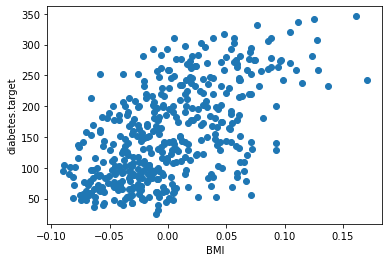

In [66]:
import matplotlib.pyplot as plt
plt.scatter(X[:,2], Y)
plt.xlabel('BMI')
plt.ylabel('diabetes.target')
plt.show()

In [67]:
bmi = X[:,np.newaxis, 2]
print(bmi.shape)
print(bmi[:5])  # 0 ~ 4행 데이터만 확인

(442, 1)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [70]:
# 442개의 데이터를 train 데이터와 test 데이터로 나눈다.
from sklearn.model_selection import train_test_split

# 442개를 8:2로 나눈다.
bmi_train, bmi_test, y_train, y_test = train_test_split(bmi, Y, test_size=0.2, random_state=123)

In [71]:
print(bmi_train.shape)
print(y_train.shape)
print(bmi_test.shape)
print(y_test.shape)

(353, 1)
(353,)
(89, 1)
(89,)


In [72]:
from sklearn.linear_model import LinearRegression

# model을 선언(정의)
model = LinearRegression()

In [73]:
# model을 학습
model.fit(bmi_train, y_train)

LinearRegression()

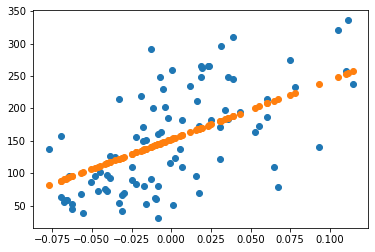

In [74]:
# 학습된 모델을 테스트
y_pred = model.predict(bmi_test)
plt.scatter(bmi_test, y_test)
plt.scatter(bmi_test, y_pred)
plt.show()